In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

Sequential is  a linear stack of layers that allows to create models layer-by-layer in a step-by-step fashion
Dense layer which is the case for fully connected neural networks. Or in the case of perceptron, the output node is connected to all the input nudes.
As such, Dense will be used to construct densely-connected NN layers.

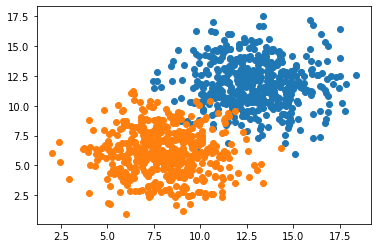

In [3]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
X = np.vstack((Xa, Xb))
# label / target
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

In [4]:
model = Sequential()

model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))

adam = Adam(lr = 0.1)

#metrics is very similar to loss function but it only judges the performance at every epoch
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
# verbose is used to distinguise which point's belongs to what's class
# verbose = 1 display the progress bar of model performance at each epoch, Verbose = 0 does not show anything 
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs = 500, shuffle='true')


E:\Neural_Network\ANN\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
20/20 [==============================] - 1s 2ms/step - loss: 2.0455 - accuracy: 0.4980
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 0.7552 - accuracy: 0.5490
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.8710
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3806 - accuracy: 0.9060
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.9190
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.9300
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.9360
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2572 - accuracy: 0.9480
Epoch 9/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2376 - accuracy: 0.9530
Epoch 10/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.9570
Epoch 11/

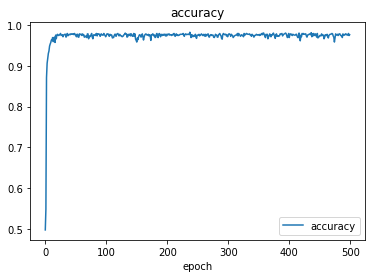

In [5]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

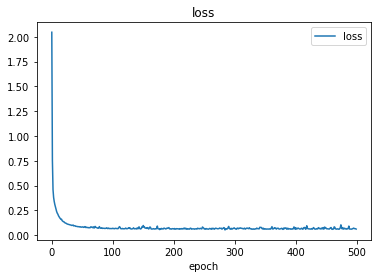

In [6]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [7]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) -1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) -1, max(X[:, 1]) + 1)
    
    print(x_span.shape)
    print(y_span.shape)
    
    print("-Meshgrid--")
    
    xx, yy = np.meshgrid(x_span, y_span)
    print(xx)
    print(yy)
    
    print("----Convert in a single array---")
    xx_, yy_ = xx.ravel(), yy.ravel()
    print(xx_)
    print(yy_)
    
    print("---grid---")
    grid = np.c_[xx_, yy_] # np.c_ means concatination
    print(grid)
    
    print("---prediction---")
    pred_func = model.predict(grid)
    print(pred_func)
    print("----")
    z = pred_func.reshape(xx.shape)
    print(z)
    plt.contourf(xx, yy, z)    

(50,)
(50,)
-Meshgrid--
[[ 1.01077428  1.38591048  1.76104668 ... 18.6421757  19.0173119
  19.39244811]
 [ 1.01077428  1.38591048  1.76104668 ... 18.6421757  19.0173119
  19.39244811]
 [ 1.01077428  1.38591048  1.76104668 ... 18.6421757  19.0173119
  19.39244811]
 ...
 [ 1.01077428  1.38591048  1.76104668 ... 18.6421757  19.0173119
  19.39244811]
 [ 1.01077428  1.38591048  1.76104668 ... 18.6421757  19.0173119
  19.39244811]
 [ 1.01077428  1.38591048  1.76104668 ... 18.6421757  19.0173119
  19.39244811]]
[[-0.08247762 -0.08247762 -0.08247762 ... -0.08247762 -0.08247762
  -0.08247762]
 [ 0.29713846  0.29713846  0.29713846 ...  0.29713846  0.29713846
   0.29713846]
 [ 0.67675454  0.67675454  0.67675454 ...  0.67675454  0.67675454
   0.67675454]
 ...
 [17.75947807 17.75947807 17.75947807 ... 17.75947807 17.75947807
  17.75947807]
 [18.13909415 18.13909415 18.13909415 ... 18.13909415 18.13909415
  18.13909415]
 [18.51871023 18.51871023 18.51871023 ... 18.51871023 18.51871023
  18.51871023]

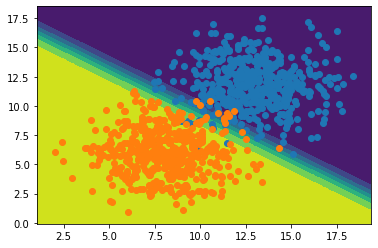

In [8]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

(50,)
(50,)
-Meshgrid--
[[ 1.01077428  1.38591048  1.76104668 ... 18.6421757  19.0173119
  19.39244811]
 [ 1.01077428  1.38591048  1.76104668 ... 18.6421757  19.0173119
  19.39244811]
 [ 1.01077428  1.38591048  1.76104668 ... 18.6421757  19.0173119
  19.39244811]
 ...
 [ 1.01077428  1.38591048  1.76104668 ... 18.6421757  19.0173119
  19.39244811]
 [ 1.01077428  1.38591048  1.76104668 ... 18.6421757  19.0173119
  19.39244811]
 [ 1.01077428  1.38591048  1.76104668 ... 18.6421757  19.0173119
  19.39244811]]
[[-0.08247762 -0.08247762 -0.08247762 ... -0.08247762 -0.08247762
  -0.08247762]
 [ 0.29713846  0.29713846  0.29713846 ...  0.29713846  0.29713846
   0.29713846]
 [ 0.67675454  0.67675454  0.67675454 ...  0.67675454  0.67675454
   0.67675454]
 ...
 [17.75947807 17.75947807 17.75947807 ... 17.75947807 17.75947807
  17.75947807]
 [18.13909415 18.13909415 18.13909415 ... 18.13909415 18.13909415
  18.13909415]
 [18.51871023 18.51871023 18.51871023 ... 18.51871023 18.51871023
  18.51871023]

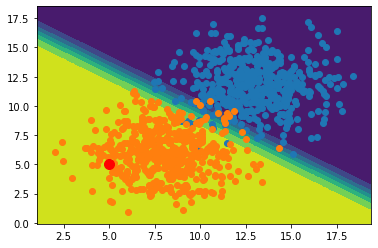

In [10]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

x = 5
y = 5

point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")